# 不完全情報ゲームのナッシュ均衡を求めるサンプル

例として、

1. $n$人の参加者はそれぞれ1~100の数字を紙に書く。ただし他の参加者と相談することはできない。他の参加者が書いた数字を見ることもできない。
2. 参加者は紙に書いた数字の額を賞金として貰える。ただし、他の参加者と書いた数字が被っていた場合、賞金は一切貰えない。

このゲームにおいて、参加者全員が最適な戦略を立てて行動した場合、賞金額の期待値はいくらになるか、また戦略はどのようになるかを求める。

考察手順や結果は[自由に賞金額を選べるが、他の人と被ったら没収ゲームの戦略を考える - Qiita](https://qiita.com/yasagureprog/items/0f601fa4d996455847b1)を参照してください。

In [10]:
import matplotlib.pyplot as plt
import numpy as np

config = {
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'font.size': 14,
    'axes.linewidth': 1.0,
    'figure.dpi': 144
}
plt.rcParams.update(config)

三分探索を行う関数を定義します。

In [11]:
def ternary_search(func, lo=0, hi=10**9):
    while lo < hi:
        mid1, mid2 = (hi+lo*2)//3, (hi*2+lo)//3
        if func(mid1) >= func(mid2):
            hi = mid2
        else:
            lo = mid1+1
    return lo

$a$を決定した時の$E$を求める関数を定義します。

In [12]:
def find_E(m, n, a):
    return ((m-a)/sum(j**(1/(1-n)) for j in range(a, m+1)))**(n-1)

問題の定義を行います。  
この問題は、選べる数字の数$m$と、プレイヤー人数$n$がまず与えられます。

以下は、$m=10$, $n=2$としたときのゲームの期待値$E$を求める手順です。

In [13]:
m, n = 10, 2

a = ternary_search(lambda x: find_E(m, n, x), lo=1, hi=m)
E = find_E(m, n, a)

print(f"a={a}, E={E}")

a=7, E=6.263463131731567


求めた$E$から、良い戦略となる選択確率の分布$\bf{p}$を作成します。  

図は、各選択に配分すべき確率の分布を表しています。横軸は選択する数字、縦軸は選ぶ確率を表しています。

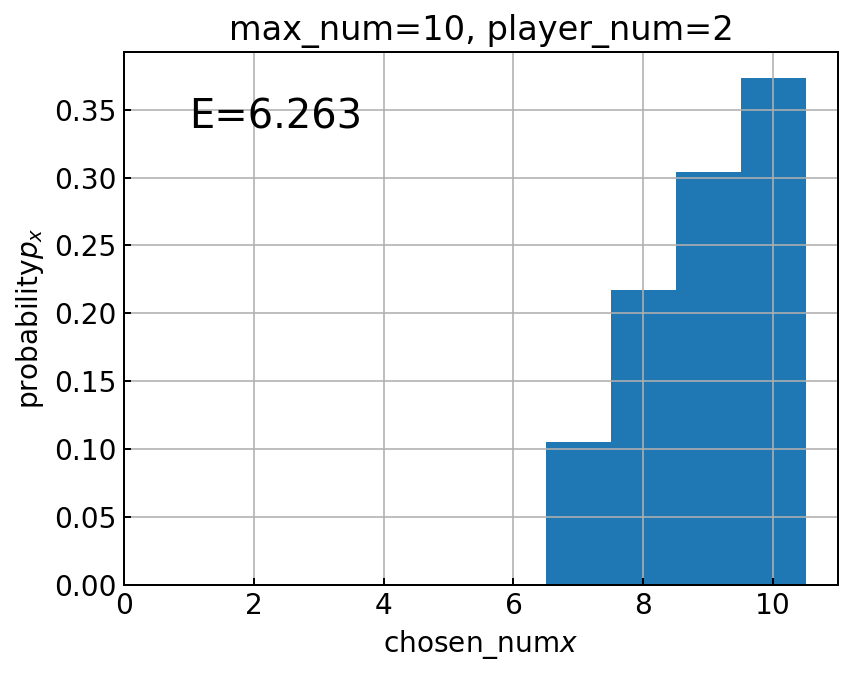

In [14]:
x_list = np.arange(1, m+1)
p_list = 1-(E/x_list)**(1/(n-1))
p_list[:a-1] = 0

plt.title(f"max_num={m}, player_num={n}")
plt.grid()
plt.bar(range(1, m+1), p_list, width=1)
plt.text(max(x_list)*0.1, max(p_list)*0.9, f"E={E:.3f}", fontsize=20)
plt.xlabel(r"chosen_num$x$")
plt.ylabel(r"probability$p_x$")
plt.show()

# 一般化

$m, n$で作成した問題から期待値$E$、良い戦略となる確率分布$\bf{p}$を返す関数を作成します。

In [15]:
def solve(m, n):
    a = ternary_search(lambda a: find_E(m, n, a), lo=1, hi=m)
    E = find_E(m, n, a)
    p_list = np.arange(1, m+1)
    p_list = 1-(E/p_list)**(1/(n-1))
    p_list[:a-1] = 0
    return E, p_list

$m=100, n=\{2, 10, 100, 1000\}$の4例について比較します。

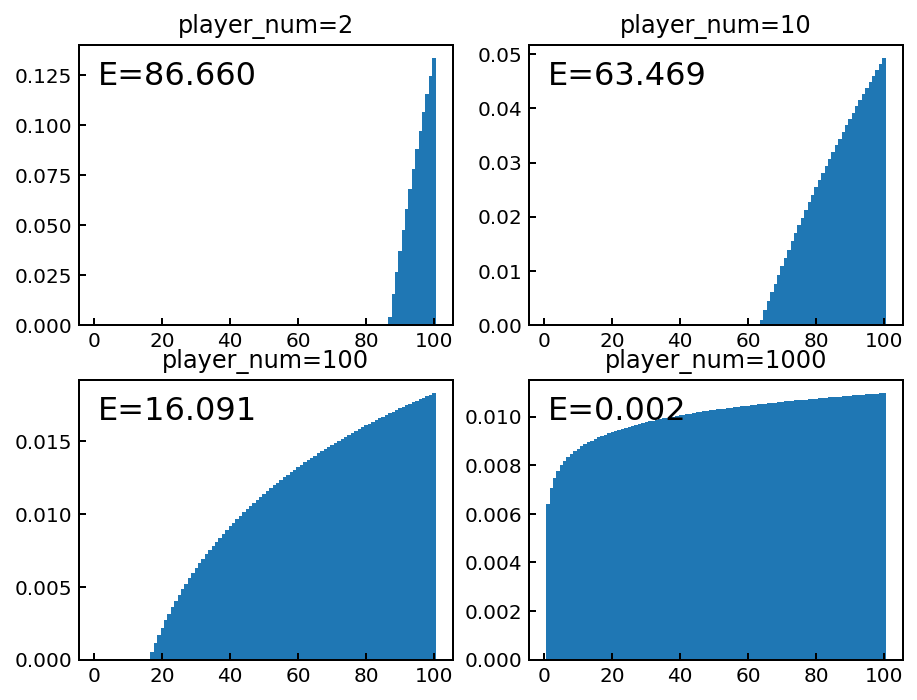

In [17]:
plt.rcParams['font.size'] = 10

n_list = [2, 10, 100, 1000]
m = 100
fig, axes = plt.subplots(2, 2)
plt.tight_layout()
for i in range(2):
    for j in range(2):
        n = n_list[i+2*j]
        E, p_list = solve(m, n)
        axes[j,i].set_title(f"player_num={n}")
        axes[j,i].bar(range(1, m+1), p_list, width=1)
        axes[j,i].text(max(x_list)*0.1, max(p_list)*0.9, f"E={E:.3f}", fontsize=16)
plt.show()